![](https://i.imgflip.com/6y2kda.gif)

## Hands-on 1 [Working with Audio]

created by : Arsydana Estu Aziz (121140068)

_Well, kinda late to the party, but shall let's move on._

Pada _hands-on_ kali ini terdapat 5 jenis audio yang berbeda, dan akan dilakukan proses analis spektogram dan analisis audio. 

### Audio Description
Pada folder `attachment` terdapat beberapa file
- `audio-low` yang merupakan sebuah audio bervolume rendah
- `audio-medium` yang merupakan sebuah audio bervolume medium (suara normal)
- `audio-high` yang merupakan sebuah audio bervolume tinggi
- `audio-ess` suara `esssss` yang direkam pada volume medium
- `audio-brbrt` suara bibir `brbrbr`.

## Task Description
Pada kesempatan kali, saya akan menjelaskan tentang analisis wave dan spektogram pada 5 sample audio berikut. 
## System pre-requirement
Analisis ini dilakukan pada `VSCode` dengan `Conda` environment sebagai package manager, dan kita akan melakukan proeses installasi 

In [1]:
## You should install the pacakge with pip install <package> 
## and use it here

import matplotlib.pyplot as plt
import numpy as np
import os
import wave

## Loading Audio File
Pada kasus ini akan dibuka satu file dan kita akan melakukan proses pembedahan gelombang dan spektogram terlebih dahulu sebelum analisis ke-5 filenya.

Kita bisa membuka file dengan package `wave`

In [2]:
file_path = os.path.join(os.getcwd(), "attachment", "audio2-medium-volume.wav")

if not os.path.exists(file_path):
    print(f"File {file_path} is not existed, you choose the wrong files fellas")
    exit()

with wave.open(file_path, "r") as files:
    audio_frames = files.readframes(-1)
    sound_data = np.frombuffer(audio_frames, dtype="int16")
    sampling_rates = files.getframerate()
    n_channels = files.getnchannels()

## Printing the content of the audio
print(f"Content of the sound_data: {sound_data}")
print(f"Length of the sound_data: {len(sound_data)}")
print(f"Sampling rate: {sampling_rates}")
print(f"Jumlah channel: {n_channels}")

Content of the sound_data: [0 0 0 ... 0 0 0]
Length of the sound_data: 234260
Sampling rate: 44100
Jumlah channel: 1


## Description
You must be wonder, what is this stuff. Let's break it (also try to not make myself forget again).

Secara sederhana, `code` ini akan digunakan untuk membuka file audio dan melihat bagaimana properti dari audio tersebut.
- `audio_frames` merupakan perintah untuk membaca semua frames dalam satu file tersebut, sehingga kita menggunakan `-1` sebagai argument dari method tersebut. 
- `sound_data` merupakan sebuah perintah untuk mengambil nilai tersebut dan melakukan koversi menjadi tipe data `int16` (sebuah tipe data yang memiliki rentang $(-\frac{2^{15}}{2}) sampai (+\frac{2^{15} - 1}{2})$ yang kita gunakan sebagai `bit-depth`).
- `sampling_rates` disini merupakan jumlah sampling rate (merupakan jumlah nilai per detik / frekuensi (biasanya dalam satuan `Hertz (Hz)`)), disini kita menggunakan nilai 44100. 

    Kenapa 44100? Karena teorema `Nyquist` yang menyatakan bahwa, karena batas pendengaran manusia terletak pada interval `20` - `20000` Hz, maka untuk menghasilkan sebuah sinyal yang halus pada suara berikut, diperlukan minimal 2 kali minimum frequensi (20000 hz sebagai upper limit pendengaran manusia). Kalian bisa membaca artikel ini untuk info [detailnya](https://www.techtarget.com/whatis/definition/Nyquist-Theorem#:~:text=It%20is%20the%20principle%20to,and%20video%20to%20reduce%20aliasing.) (I don't even know how to word this stuff).

- `n_channels` merupakan angka berapa channel pada audio tersebut, biasanya ada 2 `mono` (single channel) dan `stereo` (dual channel), hal ini berdampak bagaimana nilai audio tersebut disimpan dan dan bagaimana cara kita memprosesnya nanti.

## Visualisasi Audio

Selanjutnya kita akan melakukan proses visualisasi audio sederhana pada satu sampel terlebih dahulu.

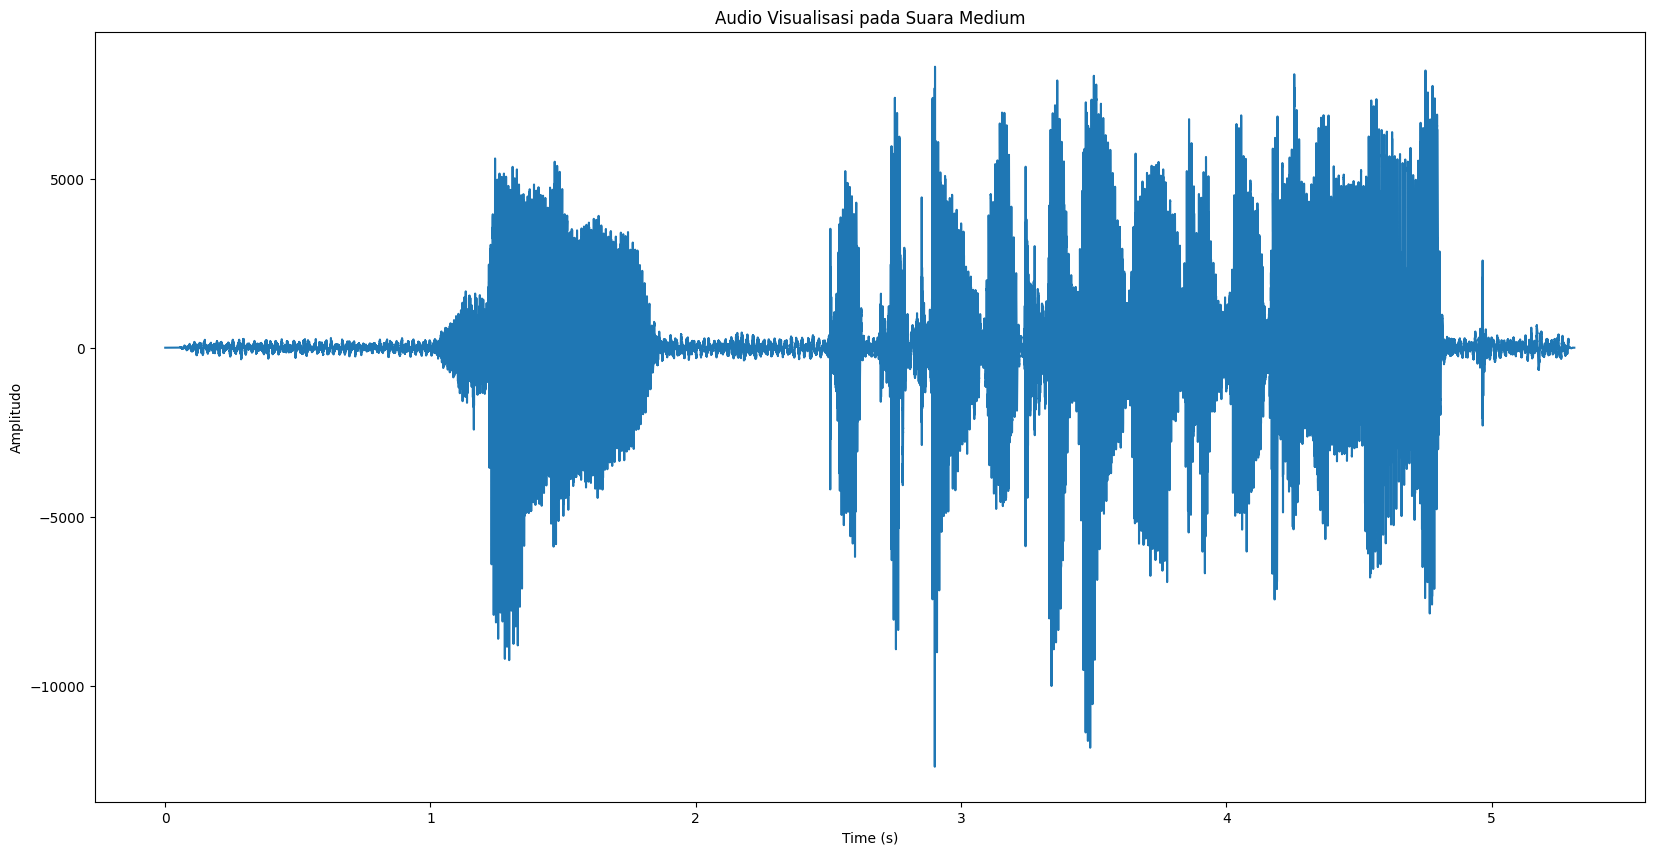

In [3]:
time_axis = np.linspace(0, len(sound_data) / sampling_rates, num=len(sound_data))

plt.figure(figsize=(20, 10))
plt.title("Audio Visualisasi pada Suara Medium")
plt.plot(time_axis, sound_data)
plt.xlabel("Time (s)")
plt.ylabel("Amplitudo")
plt.show()

## Description
You probably wondering what is this also both for the code and for the graph. let's break it down

Kita mencatat time_interval dari audio berikut dengan cara sederhana, ingat bahwasannya `time_axis` ini satuannya unit sampling, bukan detik.
$$
    \text{time length} = \frac{\text{length of sound data}}{\text{sampling rates}}
$$

Maka jika ingin mendapatkan properti audio pada detik ke-n, Tinggal di kali saja, sampling rates dengan time lengthnya.

Disini, kita menggunakan `matpotlib` sebagai package untuk menggambar grafik dari fungsi gelombang suara kali ini. 

Data pada detik ke-1 sampai 1.05


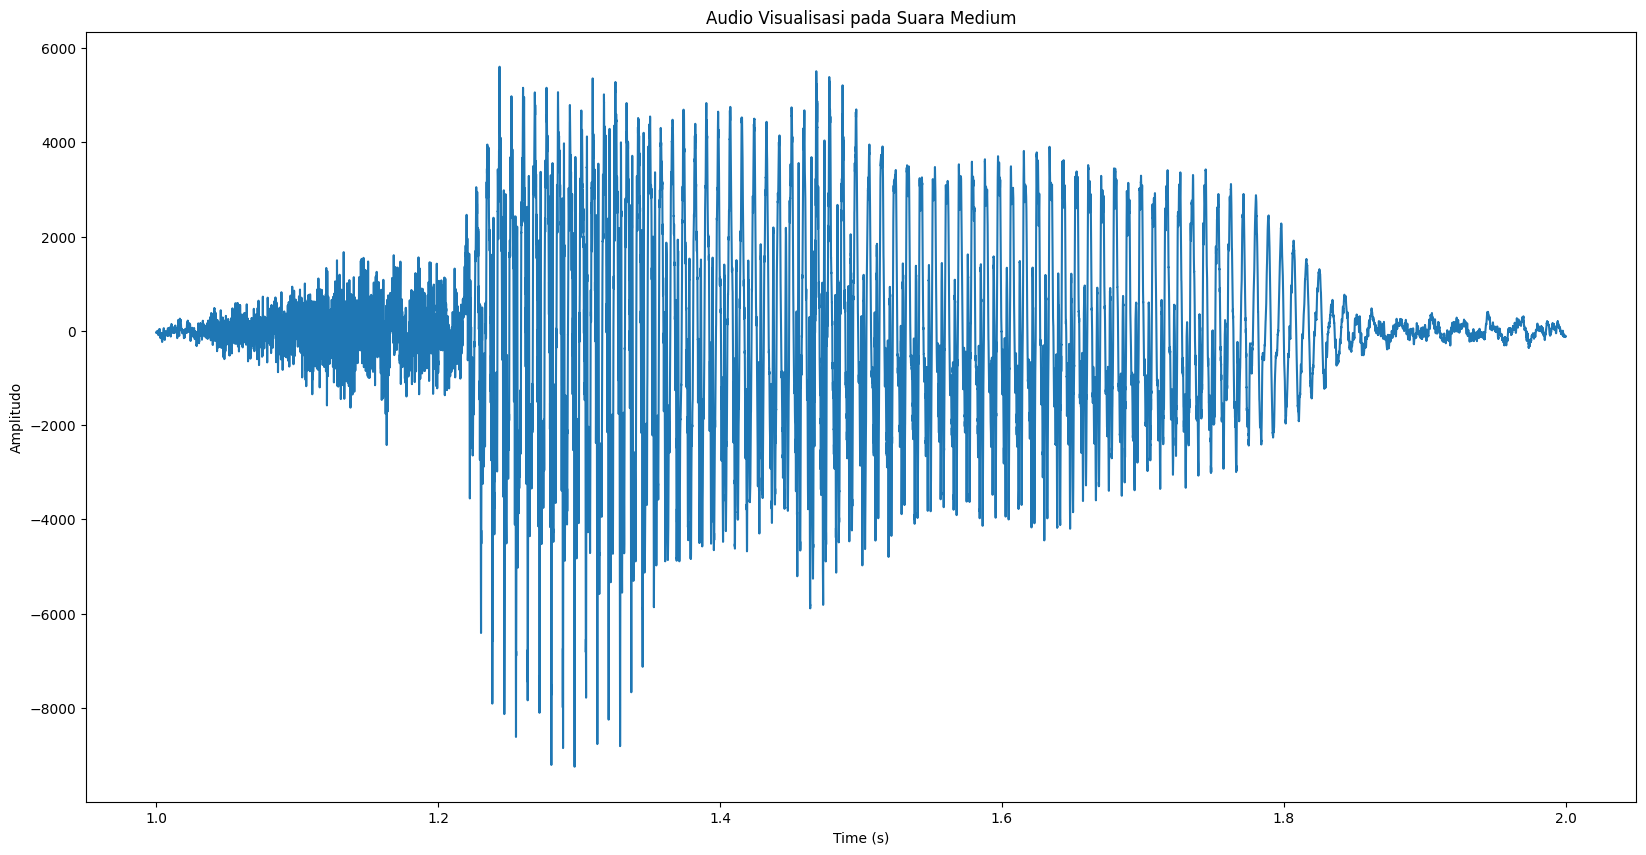

In [4]:
print("Data pada detik ke-1 sampai 1.05")
plt.figure(figsize=(20, 10))
plt.title("Audio Visualisasi pada Suara Medium")

## Representative audio pada detik ke 1 = 1 * 44100 dan detik ke 2 = 2 * 44100 = 88200
plt.plot(time_axis[44100:88200], sound_data[44100:88200]) 
plt.xlabel("Time (s)")
plt.ylabel("Amplitudo")
plt.show()

Anda pasti berfikir, apa maskud masing-masing nilai pada grafik satu ini, di satu sisi bernilai positif dan negatif. Sederhannaya, nilai tersebut adalah nilai tekanan di udara yang sudah di konversi list bilangan melalui ADC (Analog to Digital Converter).

Kalian juga pasti berfikir, apa hubungannya tekanan udara dalam proses pemrosesan audio secara digital? Cukup contrast dengan pemrosesan citra, dimana kita menggunakan nilai `uint8` (0 - 255) sebagai nilai untuk warna RGB. Untuk pemrosesan audio sendiri, nilai ini nanti akan digunakan sebagai arus listrik untuk menentukan bagaimana suara tersebut di buat oleh speaker / earphone yang kalian pakai (nilai negatif / positif merupakan nilai tekanan / refaksi pada speaker kalian untuk membuat sebuah suara, I don't even know about this stuff, someone with higher form of intelligence, please help me). 

Lalu, amplitudo sendiri merupakan satuan yang menentukan kurang lebih kerasnya suara. Semakin jauh sebuah nilai dari titik `equilibrium` (0) maka suara tersebut akan semakin besar.

Lihat hasil saya riset saya [disini](https://chatgpt.com/c/66ee2145-8bf0-8007-8b2d-b729cd99c113)

## Penggunaan Mel Spectogram

Spectogram merupkaan sebuah alat untuk melihat representasi visual dari spektrum frekuensi audio, kita menggunakan spectogram agar lebih mudah dipahami oleh manusia. Kita dapat menggunakana library `librosa` untuk dapat membuat Mel Spektogram

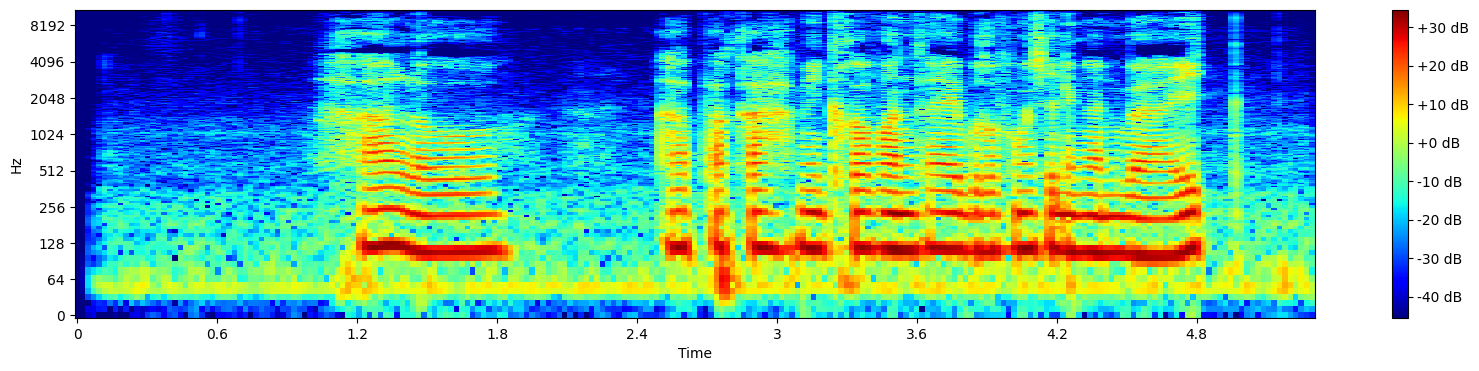

In [5]:
import librosa
import librosa.display

file_path = os.path.join(os.getcwd(), "attachment", "audio2-medium-volume.wav")

data_audio, sr = librosa.load(file_path)
S = librosa.stft(data_audio)
S_db = librosa.amplitude_to_db(np.abs(S))

plt.figure(figsize=(20, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='jet')
plt.colorbar(format='%+2.0f dB')
plt.show()

## Description
Pada Mel spectrogram:
- **Sumbu X**: Menunjukkan waktu.
- **Sumbu Y**: Menunjukkan frekuensi dalam skala Mel.
- **Warna**: Menunjukkan amplitudo atau kekuatan sinyal pada frekuensi dan waktu tertentu, diukur dalam dB (decibel).

Mel spektogram memberikan representasi yang lebih jelas mengenani spektrum didistribusikan sesuai dengan pendengaran manusia, Ini cukup membantu untuk menganalisis pola suara dan nada.

Bisa dilihat pada spektogram ini, terdapat spot merah yang menandakan bahwa teredapat bagian suara dengan volume yang besar.

## Hands-on Overview
Pada bagian kali ini akan dilakukan proses analisis pada 5 suara berikut dengan menggunakan waveforms dan spectogram untuk melakukan proses analisis.

### Analisis Suara dengan Waveforms
Pada kasus ini kita akan menggunakan waveforms untuk melihat gelombang suara pada 5 sampel yang berbeda.

In [6]:
## Create a method to handle read files and show graph, because why not

def read_wav(file_path):
    with wave.open(file_path, 'rb') as wav_file:
        # Get the parameters from the file (e.g., frame rate, number of frames)
        n_channels = wav_file.getnchannels()
        sample_width = wav_file.getsampwidth()
        frame_rate = wav_file.getframerate()
        n_frames = wav_file.getnframes()
        
        # Read frames as a byte string and convert to an array
        frames = wav_file.readframes(n_frames)
        audio_data = np.frombuffer(frames, dtype=np.int16)
        
        # If the audio is stereo, we need to reshape the array to separate the channels
        if n_channels == 2:
            audio_data = audio_data.reshape((-1, 2))
        
        return frame_rate, audio_data

def plot_waveform(file_path, frame_rate, audio_data):
    # Create a time array for x-axis based on the frame rate
    time = np.linspace(0, len(audio_data) / frame_rate, num=len(audio_data))
    
    # Plot the audio data
    plt.figure(figsize=(10, 4))
    plt.plot(time, audio_data)
    plt.title(f'Waveform of {file_path}')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()


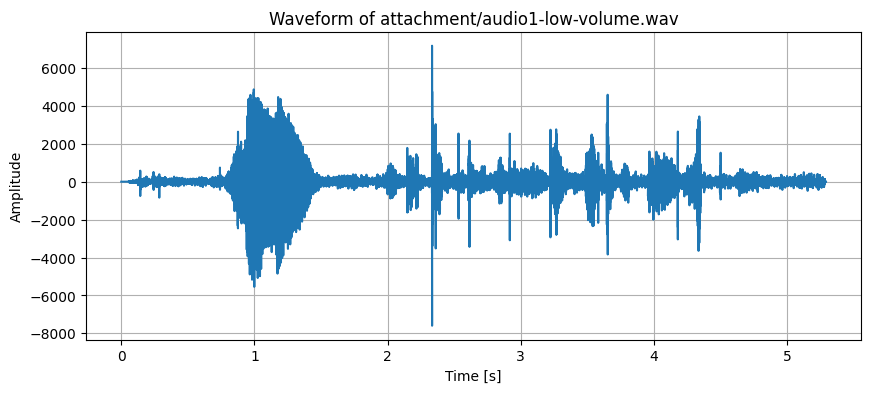

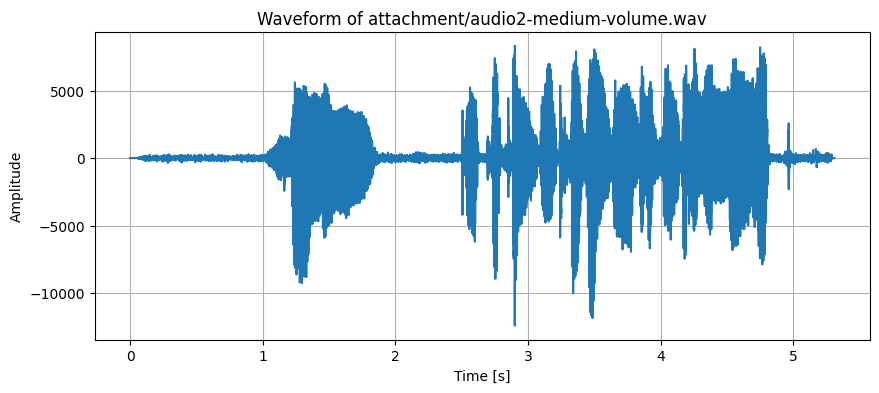

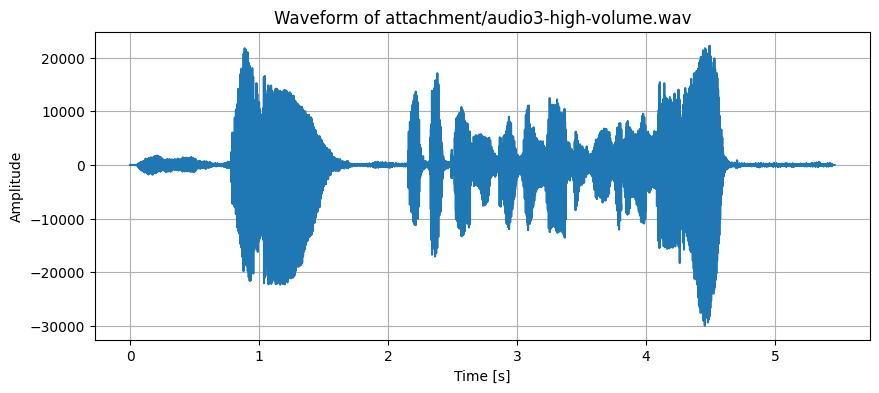

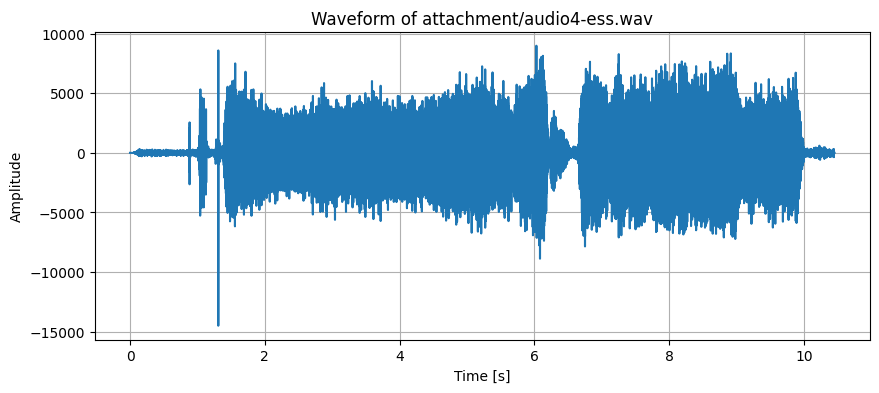

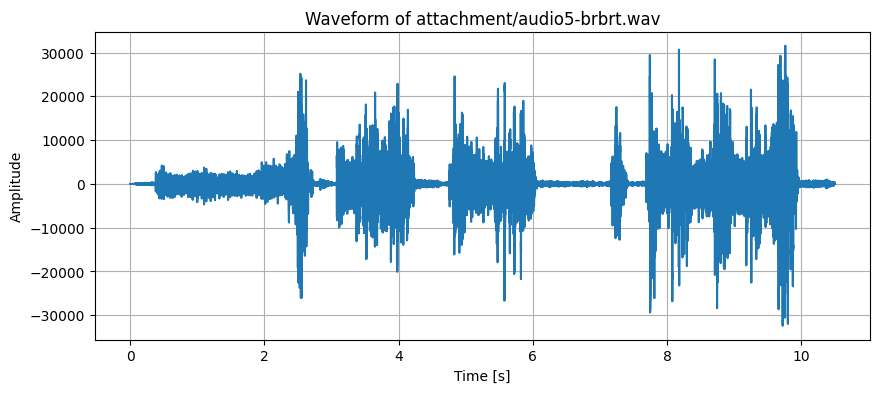

In [7]:
## Set filename
files = ["attachment/audio1-low-volume.wav", "attachment/audio2-medium-volume.wav", "attachment/audio3-high-volume.wav", "attachment/audio4-ess.wav", "attachment/audio5-brbrt.wav"]

for file in files:
    frame_rate, audio_data = read_wav(file)
    plot_waveform(file, frame_rate, audio_data)

### Analisis Graph
Berdasarkan hasil grafik ke-5 file audio tersebut, di dapat kan beberapa kesimpulan.
- `Amplitudo` adalah salah satu cara untuk mengetahui intensitas suara (seberapa keras sebuah suara), maka semakin tinggi amplitudonya, maka semakin besar juga volume suara yang dihasilkan, bisa dilihat nilai yang cukup kontrast dari `audio1` dan `audio3` dari sisi Amplitudonya.
- Untuk kasus sampel 4 dan 5, dimana seharusnya saya bisa mendapatkan suara lip trail yang konsisten (saya tidak bisa). didapatkan bahwa untuk kedua grafik tersebut, gelombang yang dilihat cukup padat yang menandakan `frekuensi` dari kedua audio tersebut sangat tinggi (frekuensi disini berati jumlah gelombang dalam satu detik (`Hertz`)). 
- Amplitudo dan Frekuensi adalah hal yang saling berbeda dimana Amplitudo bertugas dalam keras / lembutnya suara, sedangkan Frekuensi bertugas dalam tinggi / rendahnya suara (pitch). But again, I maybe wrong about this. 

## Analisis Spectogram
Waveforms cukup bagus dalam membaca properti amplitudo, namun spectogram lebih baik lagi karena bisa membaca properti dari frekuensi dari sebuah audio. 

In [31]:
def plot_spectrogram(file, audio, sr):
    S = librosa.stft(audio)
    spect_db = librosa.amplitude_to_db(np.abs(S))
    
    plt.figure(figsize=(10, 5))
    plt.title(f"Spectogram of {file}")
    librosa.display.specshow(spect_db, sr=sr, x_axis='time', y_axis='log', cmap="jet")
    plt.colorbar(format='%+2.0f dB')
    plt.show()


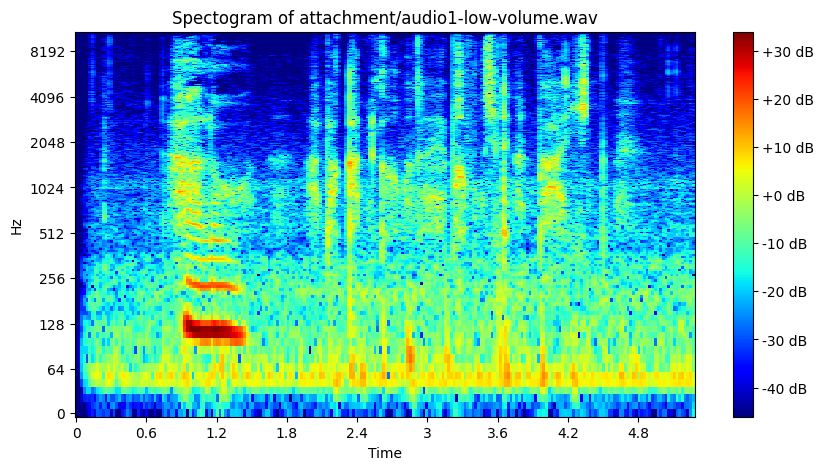

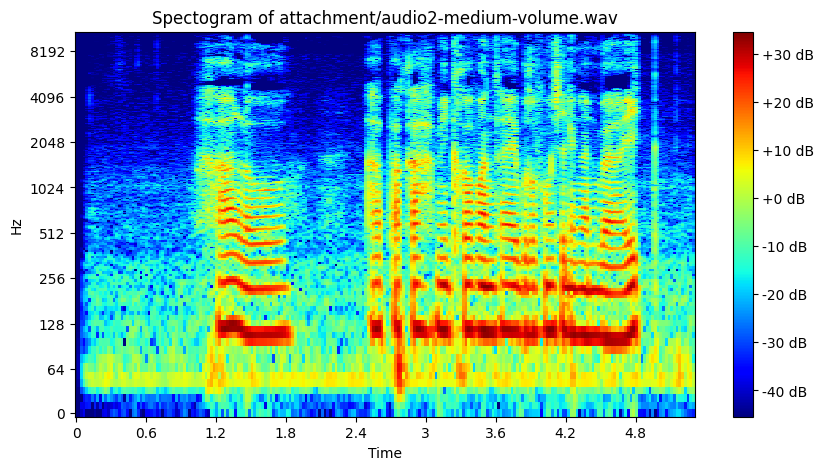

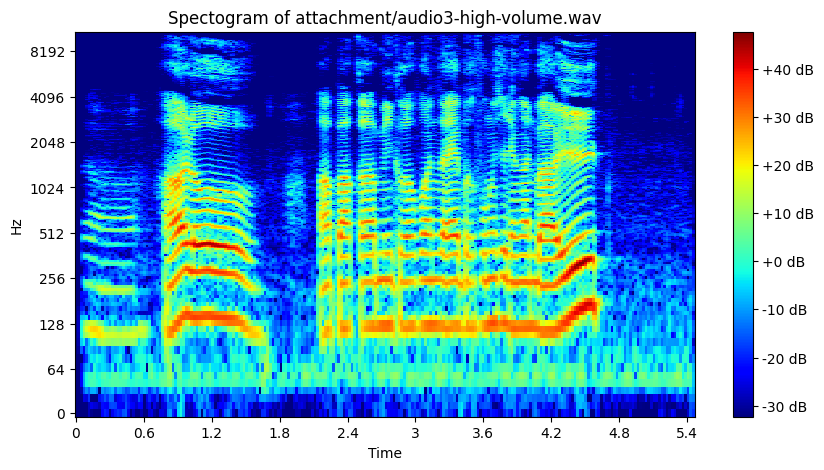

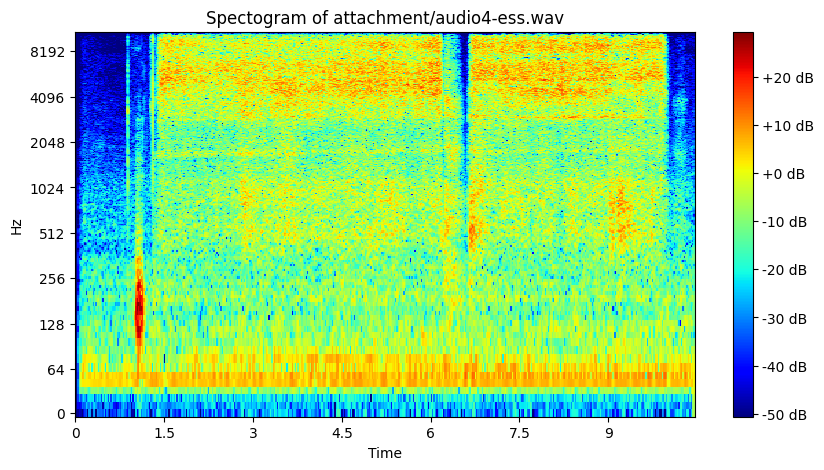

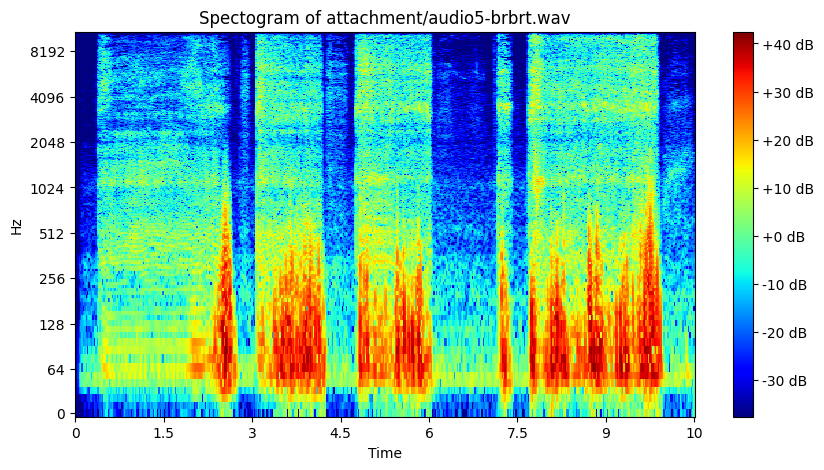

In [32]:
files = ["attachment/audio1-low-volume.wav", "attachment/audio2-medium-volume.wav", "attachment/audio3-high-volume.wav", "attachment/audio4-ess.wav", "attachment/audio5-brbrt.wav"]

for file in files:
    audio, sr = librosa.load(file)
    plot_spectrogram(file, audio, sr)


## Analisis Spectogram
- Untuk kasus sampel 4 dan 5, dapat dilihat pada tabel Spectogram ini dimana terdapat frekuensi yang tinggi pada kedua sampel berikut, untuk kasus 4 dan 5 dapat terjadi karena sifat alami dari bunyi `esss` dan `brrt` yang merupakan [fricative sounds](https://thesoundofenglish.org/fricative-consonants/#:~:text=The%20fricative%20sounds%20%2Fv%2C%C3%B0,voiceless%3B%20produced%20only%20with%20air) menghasilkan suara dengan frekuensi (pitch) yang tinggi.
Lalu apakah frekuensi yang tinggi berkorelasi dengan suara (volume) yang besar? Jawabannya tentu tidak, kedua hal tersebut saling bersebelahan dan mempunyai tugasnya masing-masing [ref](https://gemini.google.com/app/328c2b3cb5e6d32a).

## End of the Hands-on
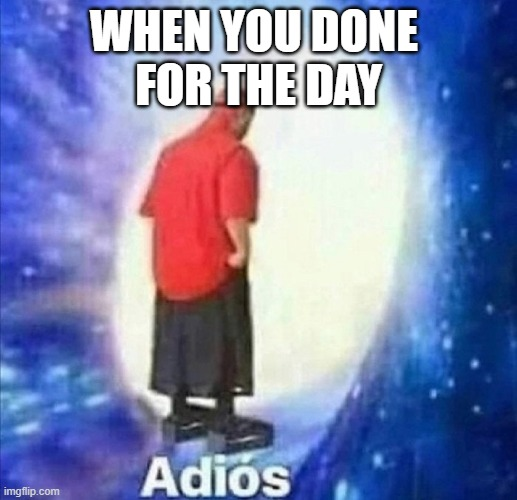

Mungkin sekian dulu analisis Hands-on saya kali ini, penjelasan saya tidak sempurna (pasti), dan saya harap mungkin bisa memberikan kepada saya penjelasan / koreksi jikalau terdapat kesalahan pada Hands-on ini. 

Sekian terimkasih, Слава Богу, все закочилось